<a href="https://colab.research.google.com/github/FabriceBeaumont/MachineLearning/blob/main/pytorch/PyTorchTutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning With PyTorch

Using:
* [Deep Learning With PyTorch - Full Course by Patrick Loeber](https://www.youtube.com/watch?v=c36lUUr864M&t=5s)

### Imports

In [26]:
from typing import List, Set, Tuple, Any, Union
import torch
import torch.nn as nn
import torchvision
import numpy as np

In [27]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('dark_background')
import seaborn as sns

In [28]:
import timeit

In [29]:
%pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=d43d0a600229b5b601d0f12047c51a2e90e4d34d5887b8296aaff7d1e0bbe3e3
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [30]:
# For NN Visualization
from torchviz import make_dot

# Introduction

## Tensors

An empty tensor (1d-tensor) equals a scalar value.

### Basic tensor operations

In [31]:
# Examples of tensors.
examples = [
    torch.empty(1),
    torch.empty(4),
    torch.empty(2, 2),
    torch.ones(1, 2, 3, dtype=torch.float16),
    torch.zeros(3, 5),
]
for x in examples:
    print(x, end="\n\n")

tensor([1.1639e-41])

tensor([-6.4167e+25,  4.3905e-41, -2.1771e+24,  4.3907e-41])

tensor([[-3.3976e-17,  1.9443e+00],
        [-6.3511e+25,  4.3905e-41]])

tensor([[[1., 1., 1.],
         [1., 1., 1.]]], dtype=torch.float16)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])



Whenever possible use the torch functions to operate on tensors, since they provied significant time benefits.

Here a demonstration on addition:

In [32]:
# Generate random samples of tuples of two 2x2 tensors.
samples = [(torch.rand(2,2), torch.rand(2,2)) for _ in range(1000)]

In [33]:
%timeit for x, y in samples: x + y

3.52 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
%timeit for x, y in samples: torch.add(x, y)

3.39 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Functions with a tailing underscore can be used to do inplace operations. E.g. `x.add_(y)` as `x += y` equivalent.

In [35]:
%timeit for x, y in samples: x.add_(y)

4.47 ms ± 548 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Overview of basic tensor functions:
- `torch.rand()`
- `torch.add()`
- `torch.sub()`
- `torch.mul()`
- `torch.pow()`

### Resizing tensors

In [36]:
x = torch.rand(4,4)
print(x)

tensor([[0.9241, 0.7340, 0.5471, 0.0352],
        [0.9451, 0.1350, 0.8274, 0.0687],
        [0.6647, 0.5089, 0.2082, 0.6935],
        [0.0738, 0.3538, 0.8004, 0.4440]])


In [37]:
# Concatenate all rows to one 1D-tensor.
y0 = x.view(16)
print(y0, end="\n\n")
# This is the same as using `flatten()`.
y1 = x.flatten()
print(y1)

tensor([0.9241, 0.7340, 0.5471, 0.0352, 0.9451, 0.1350, 0.8274, 0.0687, 0.6647,
        0.5089, 0.2082, 0.6935, 0.0738, 0.3538, 0.8004, 0.4440])

tensor([0.9241, 0.7340, 0.5471, 0.0352, 0.9451, 0.1350, 0.8274, 0.0687, 0.6647,
        0.5089, 0.2082, 0.6935, 0.0738, 0.3538, 0.8004, 0.4440])


In [38]:
# One can use the dummy value '-1' to let pytorch determine the second dimension.
y = x.view(-1, 8)
print(y)
print(y.size())

tensor([[0.9241, 0.7340, 0.5471, 0.0352, 0.9451, 0.1350, 0.8274, 0.0687],
        [0.6647, 0.5089, 0.2082, 0.6935, 0.0738, 0.3538, 0.8004, 0.4440]])
torch.Size([2, 8])


### Tensor conversions

Note that if the tenor is stored on the CPU, this will be a shallow copy (a reference and not a true copy).

In [39]:
# Instantiate a tensor on the cpu (default place).
a = torch.ones(5)
print(f"{a = }\t{type(a)}")

# Create a copy of a torch tensor by calling the numpy() function.
b = a.numpy()
print(f"{b = }\t\t{type(b)}")
# Create a copy of the numpy array from_numpy() function.
c = torch.from_numpy(b)
print(f"{c = }\t{type(c)}")

print()

# Changing the values in one variable, changes all since these are only a references.
a.add_(1)
print(f"{a = }")
print(f"{b = }")
print(f"{c = }")

a = tensor([1., 1., 1., 1., 1.])	<class 'torch.Tensor'>
b = array([1., 1., 1., 1., 1.], dtype=float32)		<class 'numpy.ndarray'>
c = tensor([1., 1., 1., 1., 1.])	<class 'torch.Tensor'>

a = tensor([2., 2., 2., 2., 2.])
b = array([2., 2., 2., 2., 2.], dtype=float32)
c = tensor([2., 2., 2., 2., 2.])


### Using a GPU

In [43]:
# Initialize the GPU as cuda device.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

When storing a tensor on the GPU, copies of it will be deep copies (an independent instance, a true copy).

In [44]:
# Instantiate a variable on the CPU and move it to be stored on the GPU.
a = torch.ones(5).to(device)
b = a.cpu().numpy()
print(f"{a = }")
print(f"{b = }")

print()

a.add_(torch.ones(5, device=device))
# Print the variable values whild on GPU.
print(f"{a = }")
print(f"{b = }")
# Print the variable values whild on CPU.
print(f"{a.cpu() = }")

a = tensor([1., 1., 1., 1., 1.])
b = array([1., 1., 1., 1., 1.], dtype=float32)

a = tensor([2., 2., 2., 2., 2.])
b = array([2., 2., 2., 2., 2.], dtype=float32)
a.cpu() = tensor([2., 2., 2., 2., 2.])


## Gradients with Autograd

If needed later, one can specify that a gradient will need to be computed for a specific variable:

In [45]:
x = torch.randn(5, requires_grad=True)
x

tensor([ 0.8661,  0.5185, -1.4285, -3.0223, -0.9230], requires_grad=True)

In [46]:
# Note that Pytorch tracs the required operations for the Backpropagation.
y = x + 2
y

tensor([ 2.8661,  2.5185,  0.5715, -1.0223,  1.0770], grad_fn=<AddBackward0>)

In [47]:
z = y * y * 2
z

tensor([16.4286, 12.6858,  0.6532,  2.0904,  2.3197], grad_fn=<MulBackward0>)

In [48]:
z_scalar = z.mean()
z_scalar

tensor(6.8356, grad_fn=<MeanBackward0>)

In [49]:
print(x.grad)
# Trigger the backward pass by calling
z_scalar.backward() # dz/dx
# Now the gradient has been computed and can be used.
print(x.grad)

None
tensor([ 2.2929,  2.0148,  0.4572, -0.8179,  0.8616])


In [50]:
x = torch.randn(3, requires_grad=True)
z = x.add(2)
z.mul_(3)

# Now the output is not a scalar value but a vector. To trigger the backwards pass, another vector is needed.
v = torch.tensor([.1, 1., .001], dtype=torch.float32)
assert x.size() == v.size(), "The vector must have the same dimension as the input dimension!"

z.backward(v) # dz/dx
print(x.grad)

tensor([0.3000, 3.0000, 0.0030])


There are several options to turn of the `requires_grad`-flag:
* `x.requires_grad_(False)`
* `x.detach()`
* `with torch.no_grad()`

In [51]:
x = torch.randn(3, requires_grad=True)
print(x)
x.requires_grad_(False)
print(x)

tensor([-0.4572, -1.8894,  0.6343], requires_grad=True)
tensor([-0.4572, -1.8894,  0.6343])


In [52]:
x = torch.randn(3, requires_grad=True)
print(x)
y = x.detach()
print(x)
print(y)

tensor([-0.3808, -0.5597, -2.3898], requires_grad=True)
tensor([-0.3808, -0.5597, -2.3898], requires_grad=True)
tensor([-0.3808, -0.5597, -2.3898])


In [53]:
x = torch.randn(3, requires_grad=True)
print(x)
with torch.no_grad():
    y = x.add(2)
    print(f"torch.no_grad - x\t{x}")
    print(f"torch.no_grad - y\t{y}")

z = x.add(2)
print(f"x\t\t\t{x}")
print(f"z\t\t\t{z}")

tensor([-0.4527,  1.2431, -0.4775], requires_grad=True)
torch.no_grad - x	tensor([-0.4527,  1.2431, -0.4775], requires_grad=True)
torch.no_grad - y	tensor([1.5473, 3.2431, 1.5225])
x			tensor([-0.4527,  1.2431, -0.4775], requires_grad=True)
z			tensor([1.5473, 3.2431, 1.5225], grad_fn=<AddBackward0>)


## Model definition step-by-step from scratch to using `torch`-framework

### Gradients by hand

In [54]:
# f = w * x
# f = 2 * x
X_test: float = 5.
Y_test: float = 2 * X_test
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
w = .0

# Training
learning_rate = 0.01
num_epochs = 20

# Model prediction.
def forward(x: torch.tensor) -> torch.tensor:
    return torch.mul(x, w)

# Loss function: MSE
def loss_mse(y: torch.tensor, y_pred: torch.tensor) -> torch.tensor:
    return torch.pow(torch.sub(y, y_pred), 2).mean()

# Gradient.
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (x*w - y)
def gradient(x: torch.tensor, y: torch.tensor, y_predicted: torch.tensor) -> torch.tensor:
    return np.dot(torch.mul(x, 2), torch.sub(y_predicted, y)).mean()

print(f"Prediction before training: f({X_test}) = {forward(X_test):.3f}")

for epoch in range(1, num_epochs + 1):
    # Prediction from the forward pass.
    y_pred = forward(X)

    # Loss computation.
    l = loss_mse(Y, y_pred)

    # Gradient computation.
    dw = gradient(X, Y, y_pred)

    # Update the weights.
    w -= torch.mul(dw, learning_rate)

    if epoch % (num_epochs//10) == 0:
        print(f"[Epoch {epoch}/{num_epochs}]:\tw = {w:.3f},\tmse_loss = {l:.8f}")


print(f"\nPrediction after training: f({X_test}) = {forward(X_test):.3f} (solution f({X_test})={Y_test})")

Prediction before training: f(5.0) = 0.000
[Epoch 2/20]:	w = 1.680,	mse_loss = 4.80000067
[Epoch 4/20]:	w = 1.949,	mse_loss = 0.12288000
[Epoch 6/20]:	w = 1.992,	mse_loss = 0.00314574
[Epoch 8/20]:	w = 1.999,	mse_loss = 0.00008053
[Epoch 10/20]:	w = 2.000,	mse_loss = 0.00000206
[Epoch 12/20]:	w = 2.000,	mse_loss = 0.00000005
[Epoch 14/20]:	w = 2.000,	mse_loss = 0.00000000
[Epoch 16/20]:	w = 2.000,	mse_loss = 0.00000000
[Epoch 18/20]:	w = 2.000,	mse_loss = 0.00000000
[Epoch 20/20]:	w = 2.000,	mse_loss = 0.00000000

Prediction after training: f(5.0) = 10.000 (solution f(5.0)=10.0)


### Gradients by Autograd

In [55]:
# f = w * x
# f = 2 * x
X_test: float = 5.
Y_test: float = 2 * X_test
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(.0, dtype=torch.float32, requires_grad=True)

# Training
learning_rate = 0.01
num_epochs = 100

# Model prediction.
def forward(x: torch.tensor) -> torch.tensor:
    return torch.mul(x, w)

# Loss function: MSE
def loss_mse(y: torch.tensor, y_pred: torch.tensor) -> torch.tensor:
    return torch.pow(torch.sub(y, y_pred), 2).mean()

print(f"Prediction before training: f({X_test}) = {forward(X_test):.3f}")

for epoch in range(1, num_epochs + 1):
    # Prediction from the forward pass.
    y_pred = forward(X)

    # Loss computation.
    l = loss_mse(Y, y_pred)

    # Gradient computation. Backward pass.
    l.backward() # dl/dw

    # Update the weights.
    with torch.no_grad():
        w -= torch.mul(w.grad, learning_rate)

    # Reset the gradients.
    w.grad.zero_()

    if epoch % (num_epochs // 10) == 0:
        print(f"[Epoch {epoch}/{num_epochs}]:\tw = {w:.3f},\tmse-loss = {l:.8f}")


print(f"\nPrediction after training: f({X_test}) = {forward(X_test):.3f} (solution f({X_test})={Y_test})")

Prediction before training: f(5.0) = 0.000
[Epoch 10/100]:	w = 1.606,	mse-loss = 1.60939169
[Epoch 20/100]:	w = 1.922,	mse-loss = 0.06237914
[Epoch 30/100]:	w = 1.985,	mse-loss = 0.00241778
[Epoch 40/100]:	w = 1.997,	mse-loss = 0.00009371
[Epoch 50/100]:	w = 1.999,	mse-loss = 0.00000363
[Epoch 60/100]:	w = 2.000,	mse-loss = 0.00000014
[Epoch 70/100]:	w = 2.000,	mse-loss = 0.00000001
[Epoch 80/100]:	w = 2.000,	mse-loss = 0.00000000
[Epoch 90/100]:	w = 2.000,	mse-loss = 0.00000000
[Epoch 100/100]:	w = 2.000,	mse-loss = 0.00000000

Prediction after training: f(5.0) = 10.000 (solution f(5.0)=10.0)


### Using `torch.nn`

In [56]:
# 1) Design the model (input, output size, forward pass)
# 2) Construct the loss and optimizer
# 3) Training loop:
# - forward pass: compute prediction
# - backward pass: gradients
# - update weights

In [57]:
X_test: torch.tensor = torch.tensor([5], dtype=torch.float32)
Y_test: torch.tensor = torch.mul(X_test, 2)
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

n_samples, n_features = X.shape
input_size  = n_features
output_size = n_features

# Hyperparameters.
learning_rate = 0.01
num_epochs = 100

# Model definition.
model = nn.Linear(input_size, output_size)

print(f"Prediction before training: f({X_test}) = {model(X_test).item():.3f}")

# Loss definition.
loss = nn.MSELoss()
# Optimizer definition.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(1, num_epochs + 1):
    # Prediction from the forward pass.
    y_pred = model(X)

    # Loss computation.
    l = loss(Y, y_pred)
    mse = torch.pow(torch.sub(Y, y_pred), 2).mean()

    # Gradient computation. Backward pass.
    l.backward() # dl/dw

    # Update the weights.
    optimizer.step()

    # Reset the gradients.
    optimizer.zero_grad()

    if epoch % (num_epochs // 10) == 0:
        print(f"[Epoch {epoch}/{num_epochs}]:\tw = {w:.3f},\tloss = {l:.8f},\tmy mse = {mse:.8f}")

print(f"\nPrediction after training: f({X_test}) = {model(X_test).item():.3f} (solution f({X_test})={Y_test})")

Prediction before training: f(tensor([5.])) = 2.544
[Epoch 10/100]:	w = 0.000,	loss = 0.66409701,	my mse = 0.66409701
[Epoch 20/100]:	w = 0.000,	loss = 0.07883577,	my mse = 0.07883577
[Epoch 30/100]:	w = 0.000,	loss = 0.06010496,	my mse = 0.06010496
[Epoch 40/100]:	w = 0.000,	loss = 0.05624063,	my mse = 0.05624063
[Epoch 50/100]:	w = 0.000,	loss = 0.05295770,	my mse = 0.05295770
[Epoch 60/100]:	w = 0.000,	loss = 0.04987501,	my mse = 0.04987501
[Epoch 70/100]:	w = 0.000,	loss = 0.04697203,	my mse = 0.04697203
[Epoch 80/100]:	w = 0.000,	loss = 0.04423805,	my mse = 0.04423805
[Epoch 90/100]:	w = 0.000,	loss = 0.04166310,	my mse = 0.04166310
[Epoch 100/100]:	w = 0.000,	loss = 0.03923812,	my mse = 0.03923812

Prediction after training: f(tensor([5.])) = 9.661 (solution f(tensor([5.]))=tensor([10.]))


### Custom module definition

In [58]:
X_test: torch.tensor = torch.tensor([5], dtype=torch.float32)
Y_test: torch.tensor = torch.mul(X_test, 2)
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

n_samples, n_features = X.shape
input_size  = n_features
output_size = n_features

# Hyperparameters.
learning_rate = 0.01
num_epochs = 100

# Model definition.
class MyLinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MyLinearRegression, self).__init__()

        # Layer definitions.
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


module = MyLinearRegression(input_size, output_size)

print(f"Prediction before training: f({X_test}) = {model(X_test).item():.3f}")

# Loss definition.
loss = nn.MSELoss()
# Optimizer definition.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(1, num_epochs + 1):
    # Prediction from the forward pass.
    y_pred = model(X)

    # Loss computation.
    l = loss(Y, y_pred)

    # Gradient computation. Backward pass.
    l.backward() # dl/dw

    # Update the weights.
    optimizer.step()

    # Reset the gradients.
    optimizer.zero_grad()

    if epoch % (num_epochs // 10) == 0:
        print(f"[Epoch {epoch}/{num_epochs}]:\tw = {w:.3f},\tloss = {l:.8f}")

print(f"\nPrediction after training: f({X_test}) = {model(X_test).item():.3f} (solution f({X_test})={Y_test})")

Prediction before training: f(tensor([5.])) = 9.661
[Epoch 10/100]:	w = 0.000,	loss = 0.03695425
[Epoch 20/100]:	w = 0.000,	loss = 0.03480332
[Epoch 30/100]:	w = 0.000,	loss = 0.03277760
[Epoch 40/100]:	w = 0.000,	loss = 0.03086976
[Epoch 50/100]:	w = 0.000,	loss = 0.02907300
[Epoch 60/100]:	w = 0.000,	loss = 0.02738077
[Epoch 70/100]:	w = 0.000,	loss = 0.02578708
[Epoch 80/100]:	w = 0.000,	loss = 0.02428614
[Epoch 90/100]:	w = 0.000,	loss = 0.02287254
[Epoch 100/100]:	w = 0.000,	loss = 0.02154126

Prediction after training: f(tensor([5.])) = 9.749 (solution f(tensor([5.]))=tensor([10.]))


# Example models

## Regression

### Linear Regression

In [59]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Data preparation.
noise = 20
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=noise, random_state=42)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# Reshape the tensor as flat tensor.
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model definition.
input_size: int = n_features
output_size: int = 1
model = nn.Linear(in_features=input_size, out_features=output_size)

# 2) Loss and optimizer.
learning_rate: float = .01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training Loop. (Forward pass, backward pass, weight update.)
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    # Forward pass.
    y_predicted = model(X)

    # Loss computation.
    loss = criterion(y_predicted, y)

    # Backward pass.
    loss.backward()

    # Weight update.
    optimizer.step()

    # Empty the gradients.
    optimizer.zero_grad()

    # Print information.
    if epoch % 10 == 0:
        print(f"[Epoch: {epoch}/{num_epochs}]:\tLoss = {loss.item():.4f}")

[Epoch: 10/100]:	Loss = 1697.9500
[Epoch: 20/100]:	Loss = 1306.4099
[Epoch: 30/100]:	Loss = 1026.6476
[Epoch: 40/100]:	Loss = 826.3743
[Epoch: 50/100]:	Loss = 682.7519
[Epoch: 60/100]:	Loss = 579.5865
[Epoch: 70/100]:	Loss = 505.3692
[Epoch: 80/100]:	Loss = 451.9020
[Epoch: 90/100]:	Loss = 413.3337
[Epoch: 100/100]:	Loss = 385.4795


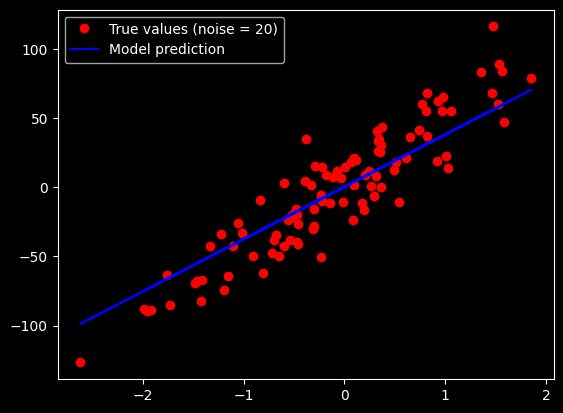

In [60]:
# Plot the loss development
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro', label=f'True values (noise = {noise})')
plt.plot(X_numpy, predicted, 'b', label='Model prediction')
plt.legend()
plt.show()

### Logistic Regression

In [61]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### 0) Data preparation.
dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target
n_samples, n_features = X.shape

# Split the data in training and testing samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Adjust the scaling of the features to have zero mean and zero variance.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

# Convert the data to torch.tensor.
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))

# Reshape the target tensor to a column vector.
y_train = y_train.view(y_train.shape[0], 1)
y_test  = y_test.view(y_test.shape[0], 1)

### 1) Model definition.
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

input_size: int = n_features
output_size: int = 1
model = LogisticRegression(n_input_features=n_features)

### 2) Loss and optimizer.
learning_rate: float = .01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### 3) Training Loop. (Forward pass, backward pass, weight update.)
num_epochs = 100
for epoch in range(1, num_epochs + 1):
    # Forward pass.
    y_predicted = model(X_train)

    # Loss computation.
    loss = criterion(y_predicted, y_train)

    # Backward pass.
    loss.backward()

    # Weight update.
    optimizer.step()

    # Empty the gradients.
    optimizer.zero_grad()

    # Print information.
    if epoch % 10 == 0:
        print(f"[Epoch: {epoch}/{num_epochs}]:\tLoss = {loss.item():.4f}")

### 4) Evaluation
with torch.no_grad():
    y_test_pred = model(X_test)
    # Round the class predictions to classes [0, 1]
    y_test_pred_classes = y_test_pred.round()
    num_classes: int = len(set(y_train.flatten().numpy()))

    acc = y_test_pred_classes.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy = {acc*100:.2f} %")

[Epoch: 10/100]:	Loss = 0.5727
[Epoch: 20/100]:	Loss = 0.4862
[Epoch: 30/100]:	Loss = 0.4291
[Epoch: 40/100]:	Loss = 0.3884
[Epoch: 50/100]:	Loss = 0.3576
[Epoch: 60/100]:	Loss = 0.3334
[Epoch: 70/100]:	Loss = 0.3137
[Epoch: 80/100]:	Loss = 0.2973
[Epoch: 90/100]:	Loss = 0.2834
[Epoch: 100/100]:	Loss = 0.2714
Accuracy = 97.37 %


#### PCA

In [62]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [63]:
# Define column names.
feat_cols: List[str] = ['Feature'+str(i) for i in range(X_test.shape[1]) ]
df = pd.DataFrame(X_test, columns=feat_cols)
# Save the data to the DataFrame.
df['y']      = y_test
df['y_pred'] = y_test_pred_classes
# Save the categorical string representation of the numerical labels.
df['label']      = df['y'].apply(lambda i: str(i))
df['label_pred'] = df['y_pred'].apply(lambda i: str(i))

print('Size of the dataframe: {}'.format(df.shape))
df.head()

Size of the dataframe: (114, 34)


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,y,y_pred,label,label_pred
0,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,0.135137,...,0.480019,-0.096496,-0.035830,-0.194351,0.172757,0.203730,1.0,1.0,1.0,1.0
1,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,-1.131215,...,-0.530514,-0.123620,-0.028181,0.991779,-0.561211,-1.008389,0.0,0.0,0.0,0.0
2,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,-0.666053,...,1.000466,-0.086163,0.499625,0.570350,-0.107831,-0.206293,0.0,0.0,0.0,0.0
3,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,1.147386,...,0.584109,0.065603,-0.163957,-0.620377,-0.553285,0.545322,1.0,1.0,1.0,1.0
4,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,0.703052,...,0.128718,-0.264407,-0.453677,-0.689644,-0.913135,-0.141789,1.0,1.0,1.0,1.0


In [64]:
# Only consider a subset of the dataset for plotting.
# Therefore consider randomly permutate the rows of the DataFrame.
np.random.seed(42)
random_permutation = np.random.permutation(df.shape[0])

In [65]:
n_components: int = 4

pca = PCA(n_components=n_components)
# Apply PCA to the DataFrame.
pca_result = pca.fit_transform(df[feat_cols].values)

# Save the analysis in new columns for each component.
component_name_pattern: str = "pca-{}"
for i in range(n_components):
    df[component_name_pattern.format(i)] = pca_result[:,i]

# Get the components with the highest evaluation.
pc_ratios = [x for x in pca.explained_variance_ratio_]
print(f'Explained variation explained by each principal component:')
for i in range(n_components):
    print(f"{component_name_pattern.format(i)}:\t{pc_ratios[i]*100:.2f}\t%")

df.head()

Explained variation explained by each principal component:
pca-0:	49.32	%
pca-1:	16.86	%
pca-2:	9.33	%
pca-3:	7.98	%


,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature28,Feature29,y,y_pred,label,label_pred,pca-0,pca-1,pca-2,pca-3
0,-0.466497,-0.137289,-0.444211,-0.486465,0.280850,0.041606,-0.111465,-0.264869,0.415241,0.135137,...,0.172757,0.203730,1.0,1.0,1.0,1.0,-0.912695,0.678834,-0.589601,0.203657
1,1.365363,0.498665,1.305511,1.341471,-0.406539,-0.013724,0.240637,0.821449,-0.833981,-1.131215,...,-0.561211,-1.008389,0.0,0.0,0.0,0.0,2.852681,-4.166322,-0.764559,-1.015197
2,0.380066,0.069220,0.404101,0.266596,0.967520,0.356414,0.726902,0.857221,0.437094,-0.666053,...,-0.107831,-0.206293,0.0,0.0,0.0,0.0,1.427427,-0.659277,-1.256862,-0.212558
3,-0.486317,-0.353185,-0.428570,-0.526233,0.694290,0.533852,-0.144722,-0.533686,0.000048,1.147386,...,-0.553285,0.545322,1.0,1.0,1.0,1.0,-1.171947,2.198449,0.207094,0.176720
4,-0.729810,-1.113514,-0.709283,-0.709281,0.294512,0.159898,-0.271202,-0.587608,0.025542,0.703052,...,-0.913135,-0.141789,1.0,1.0,1.0,1.0,-2.002476,1.897065,0.346958,-0.764893


In [67]:
# Get all samples, where the true label and the prediction do not match.
false_predicted = df.loc[df['y'] != df['y_pred']]
false_predicted_tuples: List[Tuple] = list(false_predicted[[component_name_pattern.format(0), component_name_pattern.format(1)]].apply(tuple, axis=1))
false_predicted_tuples

[(1.0157716274261475, 2.616331100463867),
 (-0.2967627942562103, 0.22140368819236755),
 (0.24111418426036835, 2.103433847427368)]

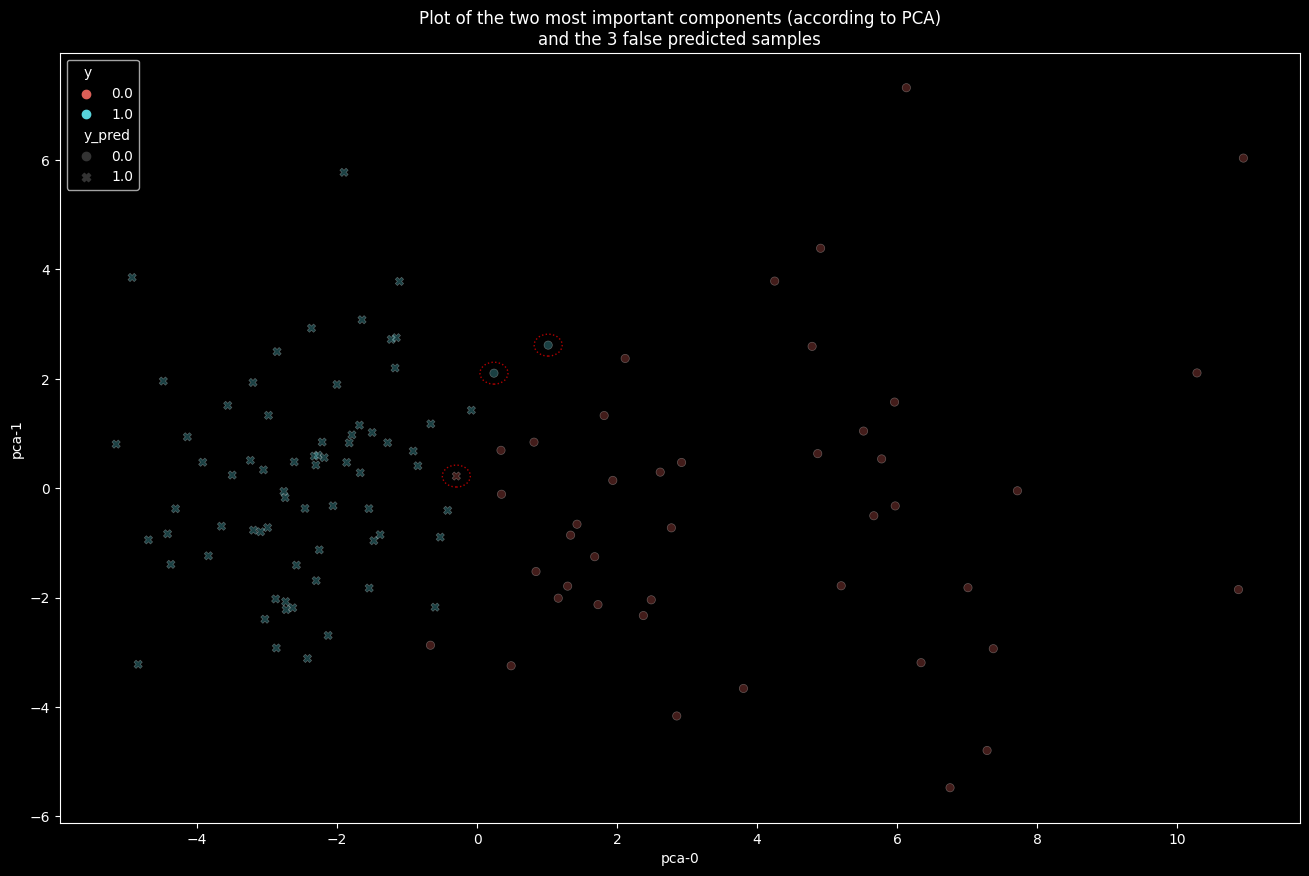

In [68]:
# Plott the data in 2D
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x=component_name_pattern.format(0), y=component_name_pattern.format(1),
    hue="y",
    style="y_pred",
    palette=sns.color_palette("hls", num_classes),
    data=df.loc[random_permutation,:],
    legend="full",
    alpha=0.3
)
# Indicate all false predictions.
for x in false_predicted_tuples:
    ax.add_patch(plt.Circle(xy=x, radius=0.2, alpha=0.7, color='red', linestyle=':', fill=False))
plt.title(f"Plot of the two most important components (according to PCA)\nand the {len(false_predicted_tuples)} false predicted samples")
plt.show()

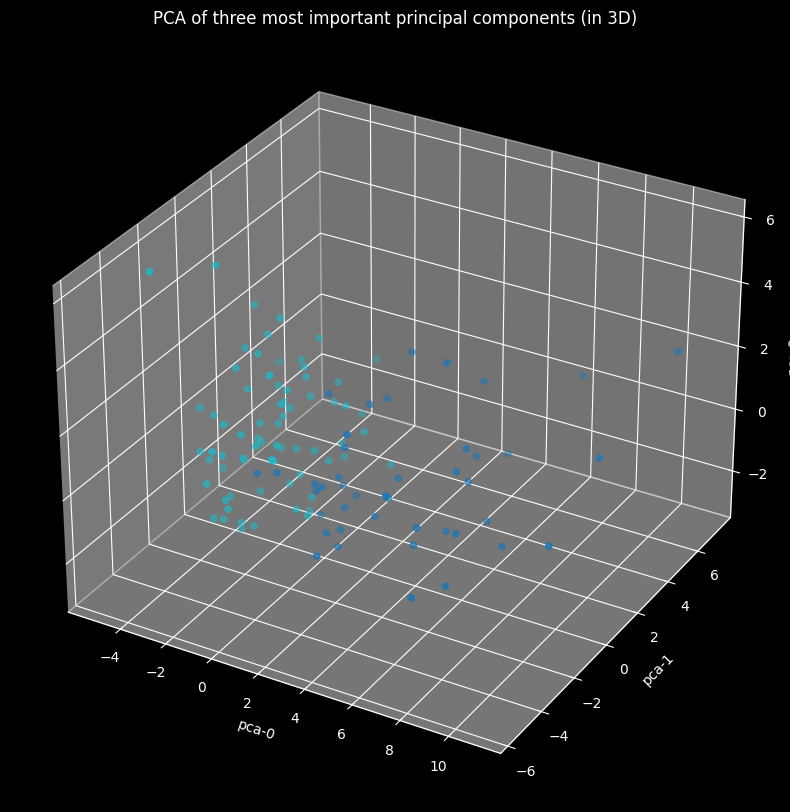

In [69]:
selected_pcs = [component_name_pattern.format(i) for i in range(3)]

# Plot the data in 3D
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[random_permutation,:][selected_pcs[0]],
    ys=df.loc[random_permutation,:][selected_pcs[1]],
    zs=df.loc[random_permutation,:][selected_pcs[2]],
    c=df.loc[random_permutation,:]["y"],
    cmap='tab10'
)
ax.set_xlabel(selected_pcs[0])
ax.set_ylabel(selected_pcs[1])
ax.set_zlabel(selected_pcs[2])
plt.title(f"PCA of three most important principal components (in 3D)")
plt.show()

# Dataloaders

Terminology: We call **iteration** a pass through a batch size. Thus each epoch consists of (*num_samples* / *batch_size*) many iterations.

In [70]:
from torch.utils.data import Dataset, DataLoader

In [71]:
# Dataset on: https://github.com/patrickloeber/pytorchTutorial/tree/master/data/wine
class WineDataset(Dataset):

    def __init__(self):
        # data loading
        xy = np.loadtxt('/content/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        # Keep the labels in size 'n_samples x 1'
        self.y = torch.from_numpy(xy[:, [0]])
        self.num_samples = xy.shape[0]

    def __getitem__(self, index) -> Tuple[torch.tensor, torch.tensor]:
        return self.x[index], self.y[index]

    def __len__(self) -> int:
        return self.num_samples

In [72]:
dataset = WineDataset()

In [73]:
# Test the dataset initialization.
first_sample = dataset[0]
features, labels = first_sample
print(f"Number of features: {len(features)}")
print(f"Number of labels:   {len(labels)}")
print(features)
print(labels)

Number of features: 13
Number of labels:   1
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
tensor([1.])


In [74]:
# Initialize a dataloader.
batch_size: int = 4
dataloader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=2)
dataiter = iter(dataloader)

In [75]:
# Test the dataloader and iterator.
data = next(dataiter)
features, labels = data
print(features)
print(labels)

tensor([[1.3050e+01, 1.6500e+00, 2.5500e+00, 1.8000e+01, 9.8000e+01, 2.4500e+00,
         2.4300e+00, 2.9000e-01, 1.4400e+00, 4.2500e+00, 1.1200e+00, 2.5100e+00,
         1.1050e+03],
        [1.2370e+01, 1.6300e+00, 2.3000e+00, 2.4500e+01, 8.8000e+01, 2.2200e+00,
         2.4500e+00, 4.0000e-01, 1.9000e+00, 2.1200e+00, 8.9000e-01, 2.7800e+00,
         3.4200e+02],
        [1.1650e+01, 1.6700e+00, 2.6200e+00, 2.6000e+01, 8.8000e+01, 1.9200e+00,
         1.6100e+00, 4.0000e-01, 1.3400e+00, 2.6000e+00, 1.3600e+00, 3.2100e+00,
         5.6200e+02],
        [1.2370e+01, 1.1300e+00, 2.1600e+00, 1.9000e+01, 8.7000e+01, 3.5000e+00,
         3.1000e+00, 1.9000e-01, 1.8700e+00, 4.4500e+00, 1.2200e+00, 2.8700e+00,
         4.2000e+02]])
tensor([[1.],
        [2.],
        [2.],
        [2.]])


Notice how the dataloader iterates over the dataset in batches of the specified size. Thus calling `next` returns the whole next batch of this size.

In [76]:
# Training loop
num_epochs: int = 2
num_samples: int = len(dataset)
num_iterations: int = num_samples // batch_size
print(f"Doing {num_iterations} iterations with batch size {batch_size} to see the whole dataset of {num_samples} samples.\n")

for epoch in range(1, num_epochs + 1):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward, backward, weight update
        if i % 5 == 0:
            print(f"[Epoch {epoch}/{num_epochs}, step {i}/{num_iterations}]\tInput shape: {inputs.shape} (batch size {inputs.shape[0]}, number of features {inputs.shape[1]})")

Doing 44 iterations with batch size 4 to see the whole dataset of 178 samples.

[Epoch 1/2, step 0/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 5/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 10/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 15/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 20/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 25/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 30/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 35/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 1/2, step 40/44]	Input shape: torch.Size([4, 13]) (batch size 4, number of features 13)
[Epoch 2/2, step 0/44]	Input shape: torch.Size([4, 13]) (batch size

# Transforms

In [77]:
# Dataset on: https://github.com/patrickloeber/pytorchTutorial/tree/master/data/wine
class WineDataset(Dataset):

    def __init__(self, transform=None):
        # data loading
        xy = np.loadtxt('/content/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        # Keep the labels in size 'n_samples x 1'
        self.y = xy[:, [0]]
        self.num_samples = xy.shape[0]

        # Save the transforms.
        self.transform = transform

    def __getitem__(self, index) -> Tuple[torch.tensor, torch.tensor]:
        sample = self.x[index], self.y[index]

        if self.transform is not None:
            sample = self.transform(sample)

        return sample

    def __len__(self) -> int:
        return self.num_samples

First, define a very simple transform which only applies the `torch.from_numpy` function to both input data and label (or target).

In [78]:
class ToTensor:
    def __call__(self, sample) -> Tuple[torch.tensor, torch.tensor]:
        inputs, targets = sample
        if not torch.is_tensor(inputs):
            inputs = torch.from_numpy(inputs)

        if not torch.is_tensor(targets):
            targets = torch.from_numpy(targets)
        return inputs, targets

In [79]:
# Test this transform.
dataset_wtransform = WineDataset(transform=ToTensor())
dataset_wotransform = WineDataset()
features_w, labels_w = dataset_wtransform[0]
features_wo, labels_wo = dataset_wotransform[0]
print(type(features_w), type(labels_w))
print(type(features_wo), type(labels_wo))

<class 'torch.Tensor'> <class 'torch.Tensor'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Another example of a simple transform.

In [80]:
class MulTransform:
    def __init__(self, factor: float):
        self.factor = factor

    def __call__(self, sample: torch.tensor) -> Tuple[torch.tensor, torch.tensor]:
        inputs, targets = sample
        return torch.mul(inputs, self.factor), targets

In [81]:
composed_transforms = torchvision.transforms.Compose([ToTensor(), MulTransform(factor=2.0)])
dataset = WineDataset(transform=composed_transforms)
features, labels = dataset[0]
print(features, labels)

tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) tensor([1.])


# Softmax and CrossEntropyLoss

Read up on the [Softmax function](https://insideaiml.com/blog/SoftMaxActivation-Function-1034)

In [82]:
def softmax(x: np.array) -> np.array:
    exp = np.exp(x)
    return exp / np.sum(exp, axis=0)

In [83]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print(f"Softmax numpy:\t{outputs}")

x = torch.tensor([2.0, 1.0, 0.1])
# Pass the dimension along which axis to compute the softmax.
outputs = torch.softmax(x, dim=0)
print(f"Softmax numpy:\t{outputs}")

Softmax numpy:	[0.65900114 0.24243297 0.09856589]
Softmax numpy:	tensor([0.6590, 0.2424, 0.0986])


Read up on the [Cross-Entropy Loss function](https://insideaiml.com/blog/SoftMaxActivation-Function-1034)

Expects One-Hot encodings of the target vector.

In [84]:
def cross_entropy(actual: np.array, predicted: np.array) -> float:
    loss = -np.sum(actual * np.log(predicted))
    return loss # / float(predicted.shape[0])

In [85]:
# Target values in one-hot encoding.
Y = np.array([1, 0, 0])
# Examples of class predictions.
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad  = np.array([0.1, 0.3, 0.6])
# Their cross entropy loss.
l_good = cross_entropy(Y, Y_pred_good)
l_bad  = cross_entropy(Y, Y_pred_bad)
print(f"Example of cross entropy loss for a good prediction:\t{l_good:.4f}")
print(f"Example of cross entropy loss for a bad  prediction:\t{l_bad:.4f}")

Example of cross entropy loss for a good prediction:	0.3567
Example of cross entropy loss for a bad  prediction:	2.3026


When using the `nn.CrossEntropyLoss`, note that it already applies the `nn.LogSoftmax` and also the `nn.NLLLoss` (negative log likelihood loss)! That is why we do not use a softmax function in the last layer.

Also the `nn.CrossEntropyLoss` does NOT expect a One-Hot encoding of the classes but just the class itself.

In [86]:
loss = nn.CrossEntropyLoss()

In [87]:
# Consider just one sample.
sample_class = 0
# Do not use one-hot encodings here, but the class itself.
Y = torch.tensor([sample_class])
# Consider a good prediction, giving the class '0' out of three possible classes the highest probability.
Y_pred_good = torch.tensor([[0.7, 0.2, 0.1]])
Y_pred_bad  = torch.tensor([[0.1, 0.3, 0.6]])

# Get the predicted classes.
_, prediction_good = torch.max(Y_pred_good, 1)
_, prediction_bad  = torch.max(Y_pred_bad, 1)

# Compute the cross entropy losses using the 'nn.Module'.
loss_good   = loss(Y_pred_good, Y)
loss_bad    = loss(Y_pred_bad, Y)
print(f"Example of cross entropy loss for a good prediction:\t{loss_good.item():.4f}\tPredicted class: {prediction_good[0]}")
print(f"Example of cross entropy loss for a bad  prediction:\t{loss_bad.item():.4f} \tPredicted class: {prediction_bad[0]}")
print(f"True classes: {Y[0]}")

Example of cross entropy loss for a good prediction:	0.7679	Predicted class: 0
Example of cross entropy loss for a bad  prediction:	1.3533 	Predicted class: 2
True classes: 0


In [88]:
# Consider three samples.
# Do not use one-hot encodings here, but the class itself.
Y = torch.tensor([2, 0, 1])
# Consider a good prediction, giving the class '0' out of three possible classes the highest probability.
Y_pred_good = torch.tensor([[0.7, 0.2, 2.1], [0.7, 0.2, 0.1], [0.3, 1.0, 0.1]])
Y_pred_bad  = torch.tensor([[0.1, 1.3, 0.1], [0.1, 2.3, 0.6], [2.1, 0.3, 0.6]])

# Get the predicted classes.
_, prediction_good = torch.max(Y_pred_good, 1)
_, prediction_bad  = torch.max(Y_pred_bad, 1)

# Compute the cross entropy losses using the 'nn.Module'.
loss_good   = loss(Y_pred_good, Y)
loss_bad    = loss(Y_pred_bad, Y)
print(f"Example of cross entropy loss for a good prediction:\t{loss_good.item():.4f}\tPredicted classes: {prediction_good}")
print(f"Example of cross entropy loss for a bad  prediction:\t{loss_bad.item():.4f} \tPredicted classes: {prediction_bad}")
print(f"True classes: {Y}")

Example of cross entropy loss for a good prediction:	0.5817	Predicted classes: tensor([2, 0, 1])
Example of cross entropy loss for a bad  prediction:	2.0857 	Predicted classes: tensor([1, 1, 0])
True classes: tensor([2, 0, 1])


# First NN from scratch

## Multiclass problems

For multiclass problems, the output size (number of classes) is at least two. Thus the hidden layers are expected to return values for each possible class. Typically the `nn.CrossEntropyLoss` can be used to evaluate these predictions. Since this function applies a `softmax` function itself, do not implement the application of a `softmax` function for the return values (during training).

In [89]:
class NeuralNetMulticlass(nn.Module):

    def __init__(self, input_size: int, hidden_size: int, num_classes: int):
        super(NeuralNetMulticlass, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x: torch.tensor) -> torch.tensor:
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear1(out)
        # No Softmax at the end need. This will be applied by using the
        # nn.CrossEntropyLoss() as loss function.
        return out

In [90]:
model = NeuralNetMulticlass(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()

## Binary problems - [Binary Cross Entropy Loss](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html)

For **binary problems**, the output size (number of classes) is always one, and corresponds to the binary decision yes (1.0) or no (0.0) of belonging to a target class. Thus the hidden layers are expected to return one value.

To evaluate it, we can use the `nn.BCELoss`. To use it we should apply the `Sigmoid` function at the end of the net.

In [92]:
class NeuralNetBinary(nn.Module):

    def __init__(self, input_size: int, hidden_size: int):
        super(NeuralNetBinary, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)

    def forward(self, x: torch.tensor) -> torch.tensor:
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear1(out)
        y_pred = torch.sigmoid(out)
        return y_pred

In [93]:
model = NeuralNetBinary(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

# Activation functions


## Step Function - not used in practise

$$ f(x) = \begin{cases} 1 &\text{if } x \ge \theta \\ 0 &\text{otherwise} \end{cases} $$

## Sigmoid Function

$$ f(x) = \frac{1}{1+e^{-x}} \qquad\in [0,1]$$

Common in the last layer for **binary classification** tasks.

Use e.g.: `torch.sigmoid()` or `nn.Sigmoid()`

## Tanh Function

$$ f(x) = \frac{2}{1+e^{-2x}}-1 \qquad\in [-1,1]$$

Scaled and shifted sigmoid function. Common in hidden layers.

Use e.g.: `torch.tanh()` or `nn.TanH()`

## ReLU Function

$$ f(x) = \max(0, x) \qquad\in [0,\infty)$$

Most popular simple activation function. Common in hidden layers as well.

Use e.g.: `torch.relu()` or `nn.ReLU()`

## Leaky ReLU Function

$$ f(x) = \begin{cases} x &\text{if } x\ge 0\\ a*x &\text{otherwise}\end{cases} \qquad\in [0,\infty)$$

Improved version of the ReLU. Tries to solve the problem of vanishing gradients. $a\in(0,1)$ is typically very small (e.g. $a=0.001$).

Use e.g.: `torch.nn.functional.leaky_relu()` or `nn.LeakyReLu()`

## Softmax Function

$$ f(x_i) = \frac{e^{x_i}}{\sum e^{x_i}} \qquad\in [0,1]^n$$

Converts the output vector to a probability distribution. Common in the last layer of **muli-classification problems**.

Use e.g.: `torch.softmax()` or `nn.Softmax()`

In [94]:
# Example use of activation functions after network layers.
class NeuralNet3(nn.Module):

    def __init__(self, input_size, hidden_size):
        super(NeuralNet3, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        # Use a relu function for the hidden layers.
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        # Use a sigmoid function for the output layer.
        self. sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out

# MNIST Dataset example

In [42]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device config.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [13]:
# Hyperparameters:
# Images will be of size 28x28, which is flattend equal to 784.
input_size: int  = 784
hidden_size: int = 100
num_classes: int = 10
num_epochs: int  = 10
batch_size: int  = 100
learning_rate: float = 0.001

## Data

In [14]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,  transform=transforms.ToTensor(), download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False)

torch.Size([100, 1, 28, 28])
torch.Size([100])


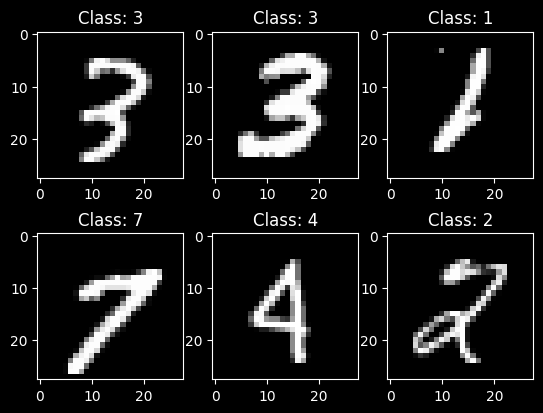

In [95]:
# Preview the first batch.
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape)
print(labels.shape)

# Show the first images from the first set.
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
    plt.title(f'Class: {labels[i]}')
plt.show()

## Model

In [16]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # Do not apply the softmax function here, since we will
        # compute the CrossEntropyLoss on this output, which contains a softmax
        # function itself.
        return out

In [17]:
# Model instanciation.
model = NeuralNet(input_size, hidden_size, num_classes)
model.to(device)

# Loss and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop.
num_steps: int = len(train_loader)
for epoch in range(1, num_epochs+1):
    for i, (images, labels) in enumerate(train_loader):
        # Load data to device.
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass.
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 100 == 0:
            print(f"[Epoch {epoch}/{num_epochs}, step {i}/{num_steps}]: Loss:\t{loss.item():.4f}")

[Epoch 1/10, step 0/600]: Loss:	2.3077
[Epoch 1/10, step 100/600]: Loss:	0.4864
[Epoch 1/10, step 200/600]: Loss:	0.2463
[Epoch 1/10, step 300/600]: Loss:	0.3169
[Epoch 1/10, step 400/600]: Loss:	0.3551
[Epoch 1/10, step 500/600]: Loss:	0.4452
[Epoch 2/10, step 0/600]: Loss:	0.1503
[Epoch 2/10, step 100/600]: Loss:	0.2392
[Epoch 2/10, step 200/600]: Loss:	0.2425
[Epoch 2/10, step 300/600]: Loss:	0.1838
[Epoch 2/10, step 400/600]: Loss:	0.2144
[Epoch 2/10, step 500/600]: Loss:	0.1054
[Epoch 3/10, step 0/600]: Loss:	0.0985
[Epoch 3/10, step 100/600]: Loss:	0.1496
[Epoch 3/10, step 200/600]: Loss:	0.1452
[Epoch 3/10, step 300/600]: Loss:	0.1317
[Epoch 3/10, step 400/600]: Loss:	0.1909
[Epoch 3/10, step 500/600]: Loss:	0.0551
[Epoch 4/10, step 0/600]: Loss:	0.1901
[Epoch 4/10, step 100/600]: Loss:	0.0956
[Epoch 4/10, step 200/600]: Loss:	0.0556
[Epoch 4/10, step 300/600]: Loss:	0.0828
[Epoch 4/10, step 400/600]: Loss:	0.0548
[Epoch 4/10, step 500/600]: Loss:	0.0758
[Epoch 5/10, step 0/600]

In [20]:
# Testing the trained model.
with torch.no_grad():
    num_correct: int = 0
    num_samples: int = 0
    for images, labels in test_loader:
        # Load data to device.
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        # Run the model on the test data.
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        # Increment the number of samples by the number of samples in this batch.
        num_samples += labels.shape[0]
        # Update the number of correct samples.
        num_correct += (predictions == labels).sum().item()

    # Compute the models accuracy.
    acc: float  = num_correct / num_samples
    print(f"Model accuracy:\t{acc * 100:.2f} %")

Model accuracy:	97.49 %


# END

[CONTINUE TUTORIAL](https://youtu.be/c36lUUr864M?si=mJn-NivxAOi9fDly&t=9757)